In [38]:
#import everything necessary for eda

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append('../helpers/')

from data import Database
from utils import Helpers

In [39]:
db = Database(host="localhost", database="telecom", user="postgres", password="heisenberg")
df = db.read_table_to_dataframe('xdr_data')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,7.349883e+18,4/23/2019 13:56,642.0,4/25/2019 2:06,53.0,130220.0,2.082003e+14,3.368112e+10,3.572961e+13,T10006B,...,21500768.0,12101768.0,12226975.0,16511157.0,340225685.0,6951608.0,483022848.0,13524725.0,50864502.0,388912579.0
1,1.311448e+19,4/23/2019 14:00,501.0,4/24/2019 23:17,453.0,119804.0,2.082014e+14,3.369966e+10,3.561431e+13,T92938B,...,7277265.0,14808877.0,5404356.0,17848389.0,281827903.0,3255023.0,746150700.0,1475289.0,38549811.0,305633791.0
2,1.311448e+19,4/23/2019 14:00,507.0,4/24/2019 23:17,453.0,119781.0,2.082014e+14,3.369966e+10,3.561431e+13,T92938B,...,10232699.0,8551438.0,8528398.0,19632728.0,73444975.0,8167950.0,787793727.0,10773216.0,49161715.0,105009018.0
3,1.311448e+19,4/23/2019 14:00,744.0,4/25/2019 0:24,330.0,123787.0,2.082017e+14,3.362404e+10,8.629340e+13,D21059A,...,15007252.0,16673992.0,14089357.0,6924105.0,174894914.0,41507.0,345556220.0,837674.0,28422142.0,209975300.0
4,1.311448e+19,4/23/2019 14:01,369.0,4/25/2019 4:13,905.0,137523.0,2.082017e+14,3.366612e+10,3.538111e+13,D42243B,...,9633967.0,17836471.0,22432445.0,11400.0,623985913.0,10539036.0,706817241.0,11317378.0,43951635.0,661274286.0


In [40]:
#for all the missing values, if they are float, replace the missing values with the mean of the column's values

for column in df.columns:
    if df[column].dtype == 'float64' and df[column].isnull().any():
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)


In [41]:
df.isnull().sum()

Bearer Id                                      0
Start                                          1
Start ms                                       0
End                                            1
End ms                                         0
Dur. (ms)                                      0
IMSI                                           0
MSISDN/Number                                  0
IMEI                                           0
Last Location Name                          1153
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%) 

Alright we got 0 missing values 


In [42]:
correlation_matrix_UL = df[['Google UL (Bytes)', 'Social Media UL (Bytes)', 'Email UL (Bytes)', 'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)']].corr()

correlation_matrix_DL = df[['Google DL (Bytes)', 'Social Media DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)']].corr()


# app_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
#                'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
#                'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
#                'Other DL (Bytes)', 'Other UL (Bytes)']

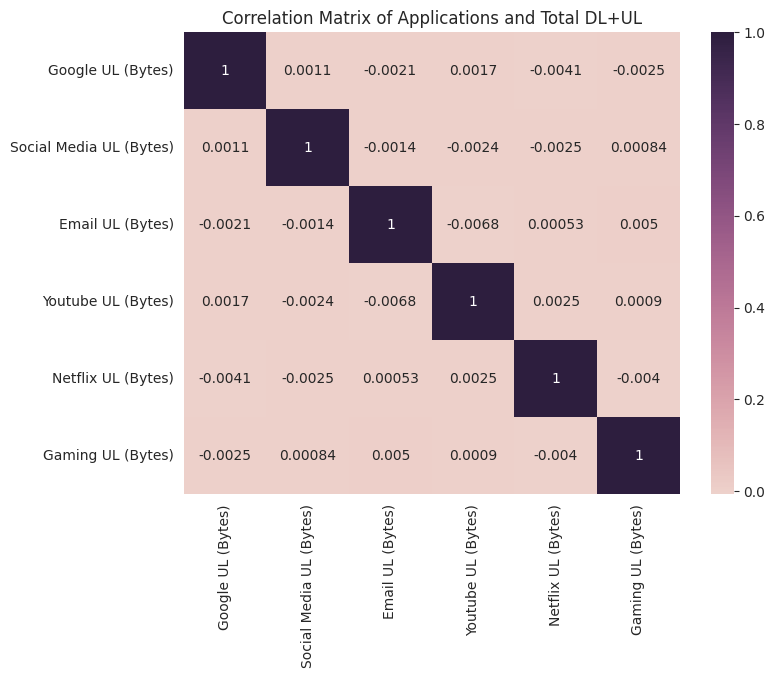

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_UL, annot=True, cmap=sns.cubehelix_palette(as_cmap=True),)
plt.title('Correlation Matrix of Applications and Total DL+UL')
plt.show()

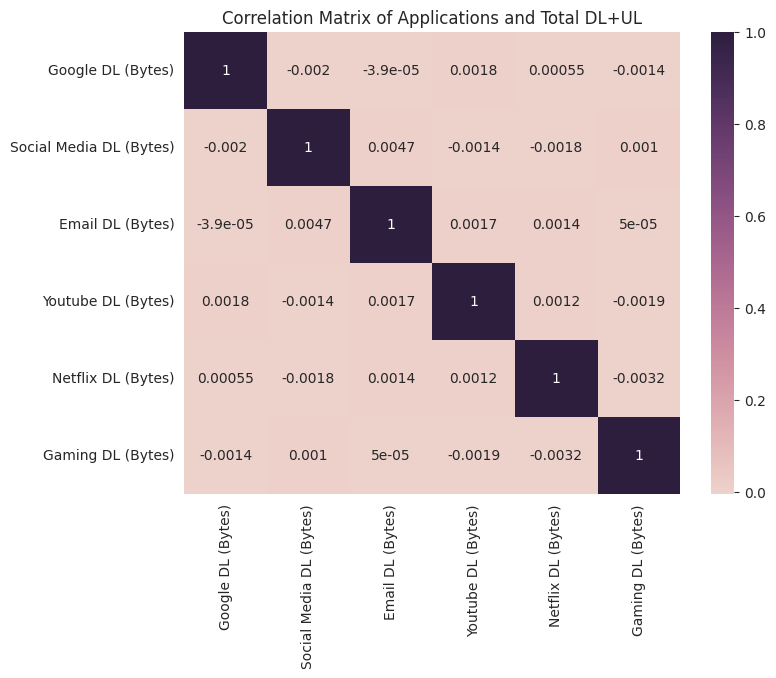

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_DL, annot=True, cmap=sns.cubehelix_palette(as_cmap=True),)
plt.title('Correlation Matrix of Applications and Total DL+UL')
plt.show()

## Get the App with the most Uploads

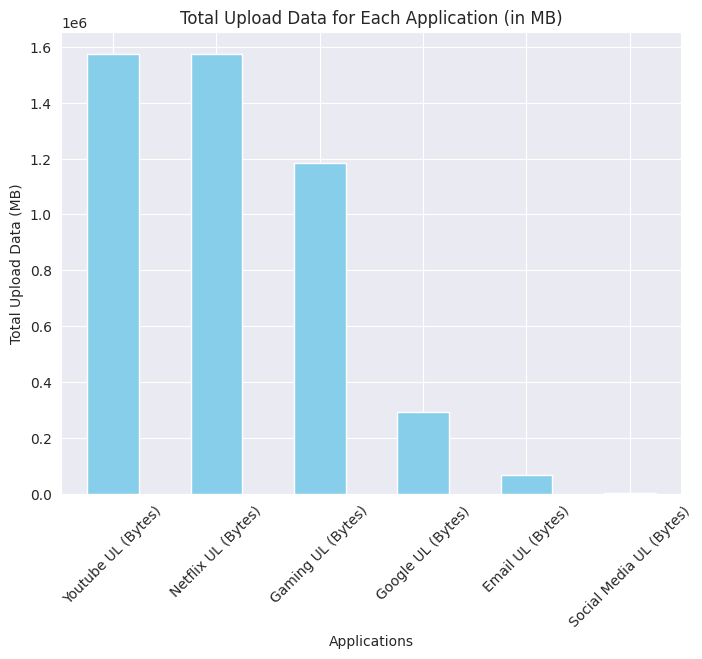

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Columns representing upload data in bytes
upload_columns = ['Google UL (Bytes)', 'Social Media UL (Bytes)', 'Email UL (Bytes)',
                  'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)']

# Function to convert bytes to megabytes
def bytes_to_megabytes(value):
    try:
        return float(value) / (1024 * 1024)
    except (ValueError, TypeError):
        return pd.NA  # Return missing value if conversion fails

# Convert bytes to megabytes and sum the data
total_upload_data = df[upload_columns].applymap(bytes_to_megabytes).sum()

# Plotting
plt.figure(figsize=(8, 6))
total_upload_data.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('Applications')
plt.ylabel('Total Upload Data (MB)')
plt.title('Total Upload Data for Each Application (in MB)')
plt.xticks(rotation=45)
plt.show()


## App with most download data chart

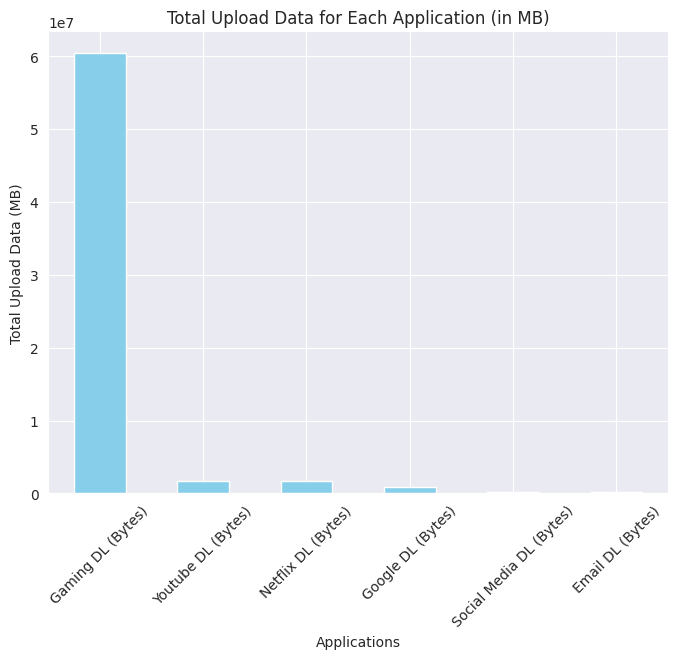

In [46]:
download_columns = ['Google DL (Bytes)', 'Social Media DL (Bytes)', 'Email DL (Bytes)',
                  'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)']

# Function to convert bytes to megabytes
def bytes_to_megabytes(value):
    try:
        return float(value) / (1024 * 1024)
    except (ValueError, TypeError):
        return pd.NA  # Return missing value if conversion fails

# Convert bytes to megabytes and sum the data
total_download_data = df[download_columns].applymap(bytes_to_megabytes).sum()


# Plotting
plt.figure(figsize=(8, 6))
total_download_data.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('Applications')
plt.ylabel('Total Upload Data (MB)')
plt.title('Total Upload Data for Each Application (in MB)')
plt.xticks(rotation=45)
plt.show()


In [47]:
# Calculate total session duration for each user
df['Total_Session_Duration'] = df['Dur. (ms)'] + df['Dur. (ms).1']

# Segment users into deciles based on total session duration
df['Decile_Rank'] = pd.qcut(df['Total_Session_Duration'], q=10, labels=False)

# Compute total data (DL+UL) for each decile class
df['Total_Data_DL_UL'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']

# Group by decile class and calculate the total data for each class
data_per_decile = df.groupby('Decile_Rank')['Total_Data_DL_UL'].sum()

# Analyze total data per decile class
 
data_per_decile


Decile_Rank
0    7.438599e+12
1    7.445444e+12
2    7.475580e+12
3    7.449831e+12
4    7.395110e+12
5    7.387711e+12
6    7.437646e+12
7    7.416929e+12
8    7.458742e+12
9    7.459600e+12
Name: Total_Data_DL_UL, dtype: float64

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming df is your DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('MSISDN/Number', errors='ignore')  # Dropping 'MSISDN/Number' column
numerical_columns = numerical_columns.drop('Bearer Id', errors='ignore')  # Dropping 'Bearer Id' column

numerical_data = df[numerical_columns]
numerical_data = numerical_data.dropna()

scaler = StandardScaler()
numerical_data = scaler.fit_transform(numerical_data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_data)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
final_df = pd.concat([df, pca_df], axis=1)

# final_df = final_df.drop('Bearer Id')
# final_df = final_df.drop('MSISDN/Number')
final_df


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_Session_Duration,Decile_Rank,Total_Data_DL_UL,PC1,PC2
0,7.349883e+18,4/23/2019 13:56,642.0,4/25/2019 2:06,53.0,130220.0,2.082003e+14,3.368112e+10,3.572961e+13,T10006B,...,6951608.0,483022848.0,13524725.0,50864502.0,388912579.0,130350631.0,7,439777081.0,-1.391790,0.893799
1,1.311448e+19,4/23/2019 14:00,501.0,4/24/2019 23:17,453.0,119804.0,2.082014e+14,3.369966e+10,3.561431e+13,T92938B,...,3255023.0,746150700.0,1475289.0,38549811.0,305633791.0,119924756.0,7,344183602.0,-1.375241,0.703958
2,1.311448e+19,4/23/2019 14:00,507.0,4/24/2019 23:17,453.0,119781.0,2.082014e+14,3.369966e+10,3.561431e+13,T92938B,...,8167950.0,787793727.0,10773216.0,49161715.0,105009018.0,119901727.0,7,154170733.0,-1.364634,0.714227
3,1.311448e+19,4/23/2019 14:00,744.0,4/25/2019 0:24,330.0,123787.0,2.082017e+14,3.362404e+10,8.629340e+13,D21059A,...,41507.0,345556220.0,837674.0,28422142.0,209975300.0,123911373.0,7,238397442.0,-0.976118,0.836206
4,1.311448e+19,4/23/2019 14:01,369.0,4/25/2019 4:13,905.0,137523.0,2.082017e+14,3.366612e+10,3.538111e+13,D42243B,...,10539036.0,706817241.0,11317378.0,43951635.0,661274286.0,137661059.0,7,705225921.0,-1.410826,1.019881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.349883e+18,4/23/2019 13:40,440.0,4/25/2019 0:05,938.0,123929.0,2.082015e+14,3.361314e+10,3.554291e+13,T85898A,...,13856748.0,799604859.0,4582819.0,49546620.0,438336637.0,124053427.0,7,487883257.0,-1.383779,0.769645
149997,7.277826e+18,4/23/2019 13:42,33.0,4/25/2019 0:54,79.0,126703.0,2.082095e+14,3.366913e+10,3.540531e+13,T86956A,...,927562.0,162162160.0,220884.0,40987504.0,224066371.0,126829749.0,7,265053875.0,-1.451963,0.610835
149998,7.349883e+18,4/23/2019 13:45,396.0,4/25/2019 5:04,563.0,141562.0,2.082003e+14,3.366454e+10,3.583681e+13,D14160B,...,12419669.0,431730550.0,15736147.0,42056744.0,146178340.0,141703729.0,7,188235084.0,-1.428198,1.085990
149999,7.349883e+18,4/23/2019 13:45,371.0,4/25/2019 0:45,801.0,125968.0,2.082014e+14,3.362153e+10,8.655450e+13,D17564A,...,5304546.0,249852131.0,15946681.0,58471297.0,573991554.0,126094398.0,7,632462851.0,-0.988966,0.863828


In [57]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 60 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 60 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  float64       
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150001 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150001 non-null  float64       
 5   Dur. (ms)                                 150001 non-null  float64       
 6   IMSI                                      150001 non-null  float64       
 7   MSISDN/Number                             150001 non-null  float64       
 8   IMEI                                      150001 non-null  float64       
 9   Last Location N